In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
%matplotlib inline 
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv('cleanedhousing.csv')

In [20]:
df

,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Electrical_E,KitchenQual_E,Functional_E,FireplaceQu_E,GarageType_E,GarageFinish_E,GarageQual_E,GarageCond_E,PavedDrive_E,Fence_E
0,856,126000,0.0,7890,6,6,1939,1950,0.0,238.0,...,5.0,3.0,7.0,5.0,3.0,2.0,4.0,5.0,3.0,5.0
1,1049,139500,42.0,4235,5,5,1984,1984,149.0,552.0,...,5.0,4.0,7.0,1.0,6.0,4.0,4.0,5.0,3.0,5.0
2,1001,124900,60.0,6060,5,9,1930,2007,0.0,737.0,...,5.0,4.0,7.0,1.0,3.0,2.0,4.0,1.0,1.0,5.0
3,1039,114000,80.0,8146,4,8,1900,2003,0.0,0.0,...,5.0,3.0,7.0,1.0,3.0,2.0,4.0,5.0,1.0,5.0
4,1665,227000,70.0,8400,8,6,2001,2001,0.0,643.0,...,5.0,4.0,7.0,1.0,6.0,4.0,4.0,5.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,952,121000,0.0,8854,6,6,1916,1950,0.0,0.0,...,2.0,2.0,7.0,5.0,3.0,2.0,3.0,1.0,2.0,5.0
2576,1733,139600,0.0,13680,3,5,1955,1955,0.0,0.0,...,3.0,3.0,5.0,5.0,6.0,2.0,4.0,5.0,3.0,5.0
2577,2002,145000,82.0,6270,5,6,1949,1950,0.0,284.0,...,3.0,3.0,7.0,1.0,4.0,2.0,4.0,5.0,3.0,5.0
2578,1842,217500,0.0,8826,7,5,2000,2000,144.0,841.0,...,5.0,4.0,7.0,4.0,6.0,4.0,4.0,5.0,3.0,5.0


In [21]:
use_cols = df.loc[:, df.columns != 'SalePrice'].columns.tolist()

In [22]:
X = df[use_cols]
y = df['SalePrice']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=42)

R^2 for train set: 0.879091
--------------------------------------------------
R^2 for test  set: 0.886212
--------------------------------------------------
RSS is equal to 893946514887.739


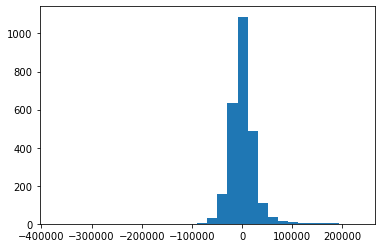

In [35]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(X_train,y_train)
residuals = y - ols.predict(X)
print("R^2 for train set: %f" %ols.score(X_train, y_train))

print('-'*50)
print("R^2 for test  set: %f" %ols.score(X_test, y_test))
print('-'*50)

residuals = y - ols.predict(X)
print('RSS is equal to %.3f' %np.sum((residuals))**2)


_=plt.hist(residuals, bins=30)

In [36]:
import statsmodels.api as sm
x = sm.add_constant(X)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(np.log(y), x)
results = model.fit()
print(results.summary()) # How to print out the summary report

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     565.5
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:35:48   Log-Likelihood:                 1911.3
No. Observations:                2580   AIC:                            -3729.
Df Residuals:                    2533   BIC:                            -3453.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.2874      0.408     12.

In [45]:
print('The insignificant coefficients')
pValues[pValues>=0.05]

The insignificant coefficients


MasVnrArea        0.758295
BsmtUnfSF         0.198275
WoodDeckSF        0.087046
OpenPorchSF       0.614208
3SsnPorch         0.218277
PoolArea          0.852588
LandSlope_E       0.179127
RoofStyle_E       0.446647
ExterQual_E       0.055588
BsmtCond_E        0.710150
Electrical_E      0.361572
GarageType_E      0.958190
GarageFinish_E    0.148892
GarageQual_E      0.508312
GarageCond_E      0.100206
Fence_E           0.472107
dtype: float64

In [44]:
pValues = results.pvalues
print('The significant coefficients')
pValues[pValues<0.05]

The significant coefficients


const             3.576913e-37
GrLivArea        8.804329e-101
LotFrontage       3.443738e-04
LotArea           5.888684e-11
OverallQual       2.053720e-80
OverallCond       1.520447e-55
YearBuilt         5.635675e-20
YearRemodAdd      2.427170e-04
BsmtFinSF1        1.638333e-38
BsmtFinSF2        1.641579e-04
TotalBsmtSF       8.067038e-59
LowQualFinSF      2.798911e-02
BedroomAbvGr      6.995651e-05
KitchenAbvGr      2.457479e-05
TotRmsAbvGrd      3.105159e-04
Fireplaces        1.335961e-02
GarageCars        2.150111e-03
GarageArea        3.958875e-03
EnclosedPorch     1.629059e-05
ScreenPorch       4.671604e-06
Baths             4.408648e-02
MSZoning_E        1.108589e-38
LotShape_E        2.544777e-03
LandContour_E     8.428842e-06
ExterCond_E       2.572435e-03
BsmtQual_E        9.807005e-03
HeatingQC_E       6.579132e-10
CentralAir_E      2.697915e-04
KitchenQual_E     2.204577e-05
Functional_E      1.580058e-06
FireplaceQu_E     2.076541e-02
PavedDrive_E      6.291033e-03
dtype: f

## Detecting Multicollinearity 

In [26]:
df.columns

Index(['GrLivArea', 'SalePrice', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Baths',
       'MSZoning_E', 'LotShape_E', 'LandContour_E', 'LandSlope_E',
       'RoofStyle_E', 'ExterQual_E', 'ExterCond_E', 'BsmtQual_E', 'BsmtCond_E',
       'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E',
       'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E',
       'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'Fence_E'],
      dtype='object')

In [27]:
scores = {}
ols2 = LinearRegression()
from sklearn.metrics import r2_score
for feature_name in use_cols:
                df2     = df.copy()
                feature = df2[feature_name].copy()
                df2.drop(feature_name, axis=1, inplace=True)
                ols2.fit(df2, feature)
                scores[feature_name] = ols2.score(df2, feature)  

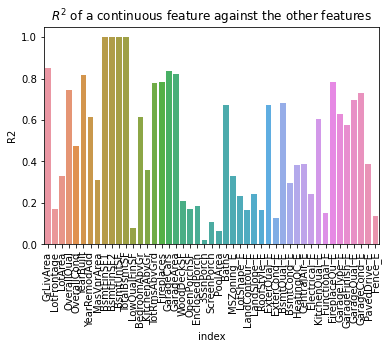

In [28]:
features = sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index())
plt.title('$R^2$ of a continuous feature against the other features')

for item in features.get_xticklabels():
    item.set_rotation(90)